<a href="https://colab.research.google.com/github/CristianLopez1003/Data-Science---Entrega-Final-Curso-2/blob/main/Primera_entrega_DATA_SCIENCE_Cristian_L%C3%B3pez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


En el ámbito del análisis de datos, una de las principales metas es extraer información valiosa a partir de conjuntos de datos, con el fin de comprender mejor el contexto en el que se desarrollan ciertos fenómenos o procesos. En este proyecto de Data Science, utilizaremos herramientas como Google Colab, Matplotlib y Pandas para analizar una base de datos específica y descubrir insights que nos permitan comprender mejor una oportunidad de negocio.

Contexto del Proyecto

La base de datos en cuestión contiene información relevante sobre propiedades inmobiliarias en una determinada región. A través del análisis de esta información, nos proponemos identificar patrones, tendencias y relaciones que nos ayuden a comprender mejor el mercado inmobiliario local.

Objetivos del Proyecto

Explorar y familiarizarnos con la estructura y contenido de la base de datos.
Realizar un análisis descriptivo de las variables principales, como el precio de las propiedades, su disponibilidad y ubicación geográfica.
Identificar correlaciones y relaciones entre las diferentes variables para comprender mejor los factores que influyen en el precio y la demanda de las propiedades.
Utilizar técnicas de visualización de datos para representar gráficamente los resultados y facilitar su interpretación.
Aplicar modelos predictivos para realizar pronósticos sobre el comportamiento futuro del mercado inmobiliario, lo que podría ayudar a tomar decisiones informadas en el ámbito empresarial.
Herramientas y Tecnologías Utilizadas

En este proyecto, utilizaremos Google Colab como entorno de desarrollo, que nos permite trabajar de manera colaborativa en notebooks de Jupyter en la nube. Además, haremos uso de las bibliotecas de Python como Matplotlib y Pandas, que nos proporcionan funcionalidades para el análisis y la visualización de datos de manera efectiva.

A través de este enfoque, esperamos obtener información valiosa que pueda servir como base para la toma de decisiones estratégicas en el ámbito inmobiliario, y demostrar el potencial de la ciencia de datos como herramienta para generar insights y pronósticos en diversos contextos empresariales.


Gracias por la información detallada sobre tu proyecto. Con base en esto, podemos formular algunas hipótesis que orienten tu análisis de datos y te permitan explorar y validar las relaciones y patrones que mencionaste en el contexto del mercado inmobiliario. Aquí tienes algunas hipótesis potenciales:

Hipótesis del Proyecto

Hipótesis sobre la ubicación y el precio

H1: Las propiedades ubicadas en ciertos barrios (Neighbourhood) tienen precios significativamente más altos en comparación con otras áreas.

Hipótesis sobre la disponibilidad y la demanda

H2: Las propiedades con mayor disponibilidad anual (Availability_365) tienen una menor demanda en comparación con aquellas con menor disponibilidad

Hipótesis sobre el revenue y la disponibilidad

H3: Las propiedades con una menor disponibilidad, poseen un mayor revenue

Datos: Id
Name
Host_id
Host_name
Neighbourhood_group
Neighbourhood
Latitude
Longitude
Room_type
Price
Mínimum_nights
Last_review
Reviews_per_month
Calculated_host_listings_count
Availability_365

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv('BBDD_ORIGINAL_AIRBNB.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)

In [8]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
id,48895,100.000000
name,47905,97.975253
host_id,37457,76.607015
host_name,11452,23.421618
neighbourhood_group,5,0.010226
neighbourhood,221,0.451989
latitude,19048,38.956949
longitude,14718,30.101237
room_type,3,0.006136
price,674,1.378464


In [9]:
#Aqui se cuentan las propiedades, para luego revisar cuantas propiedades hay por cada comuna
propiedades_por_grupo = df['neighbourhood_group'].value_counts()

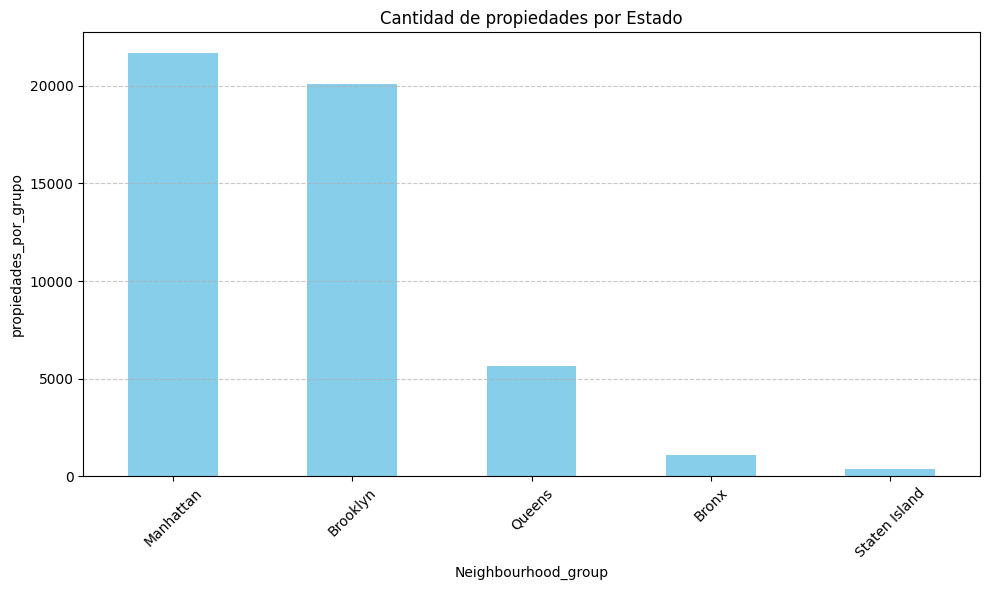

In [10]:
plt.figure(figsize=(10, 6))
propiedades_por_grupo.plot(kind='bar', color='skyblue')
plt.title('Cantidad de propiedades por Estado')
plt.xlabel('Neighbourhood_group')
plt.ylabel('propiedades_por_grupo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
#Se calculo el precio promedio, para luego revisar cual es el precio promedio por comuna
precio_promedio_por_grupo = df.groupby('neighbourhood_group')['price'].mean()

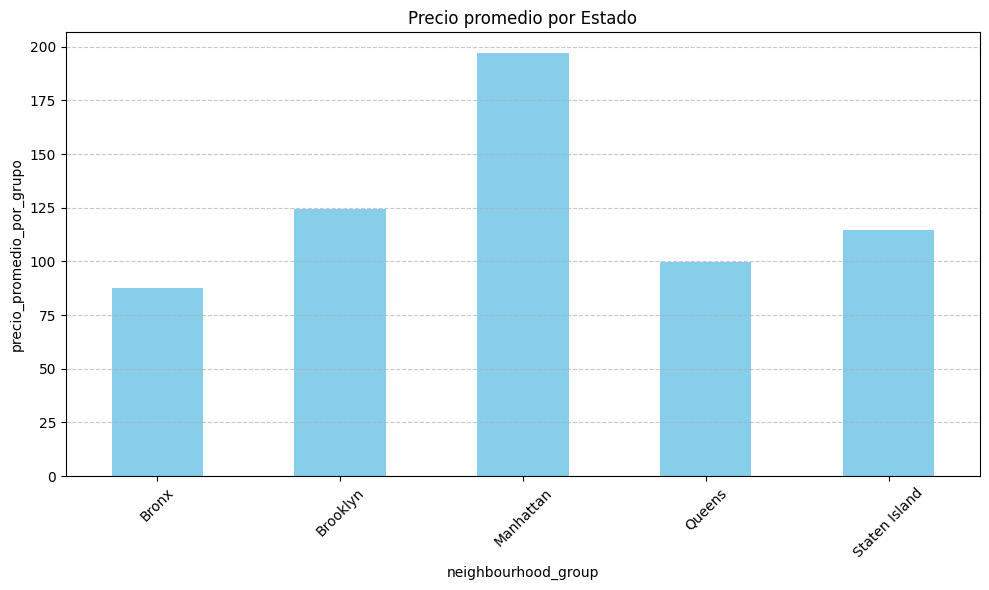

In [ ]:
plt.figure(figsize=(10, 6))
precio_promedio_por_grupo.plot(kind='bar', color='skyblue')
plt.title('Precio promedio por Estado')
plt.xlabel('neighbourhood_group')
plt.ylabel('precio_promedio_por_grupo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
#En esta ocasion se analizara cuantos dias estan utilizados al año cada propiedad, luego sacar un promedio, y graficar los dias promedios arrendados por cada una o de las comunas
df['dias_arrendados'] = 365 - df['availability_365']

In [13]:
promedio_por_propiedad = df.groupby('id')['dias_arrendados'].mean().reset_index()

In [14]:
promedio_por_grupo = df.merge(promedio_por_propiedad, on='id').groupby('neighbourhood_group')['dias_arrendados_y'].mean().reset_index()

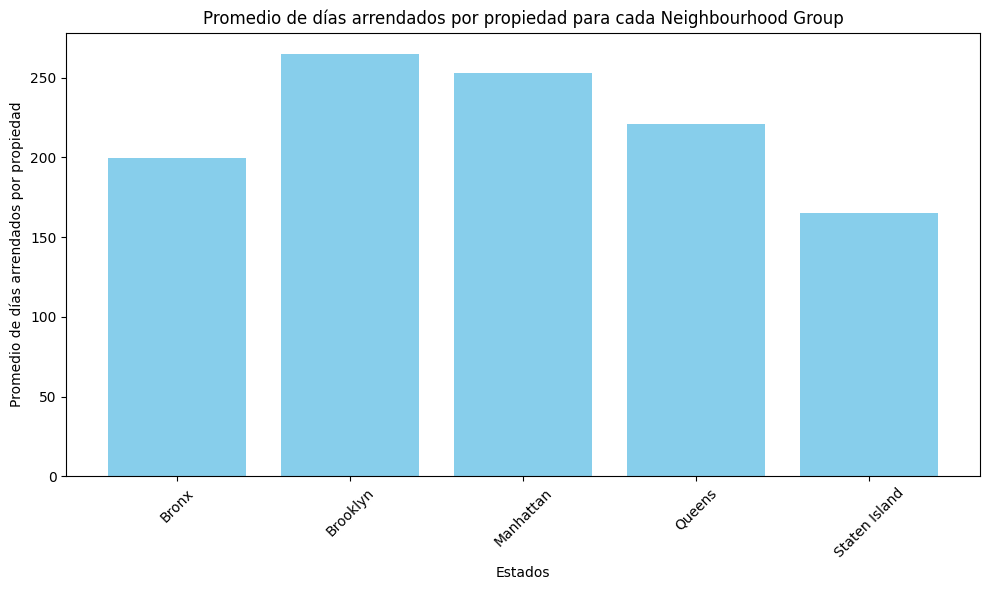

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(promedio_por_grupo['neighbourhood_group'], promedio_por_grupo['dias_arrendados_y'], color='skyblue')
plt.xlabel('Estados')
plt.ylabel('Promedio de días arrendados por propiedad')
plt.title('Promedio de días arrendados por propiedad para cada Neighbourhood Group')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [16]:
#Ahora se calculara el ingreso anual por cada propiedad, para luego sacar el ingreso anual promedio por cada comuna
df['ingreso_anual'] = df['price'] * (365 - df['availability_365'])


In [17]:
promedio_ingreso_propiedad = df.groupby('id')['ingreso_anual'].mean().reset_index()

In [18]:
promedio_ingreso_grupo = df.merge(promedio_ingreso_propiedad, on='id').groupby('neighbourhood_group')['ingreso_anual_y'].mean().reset_index()


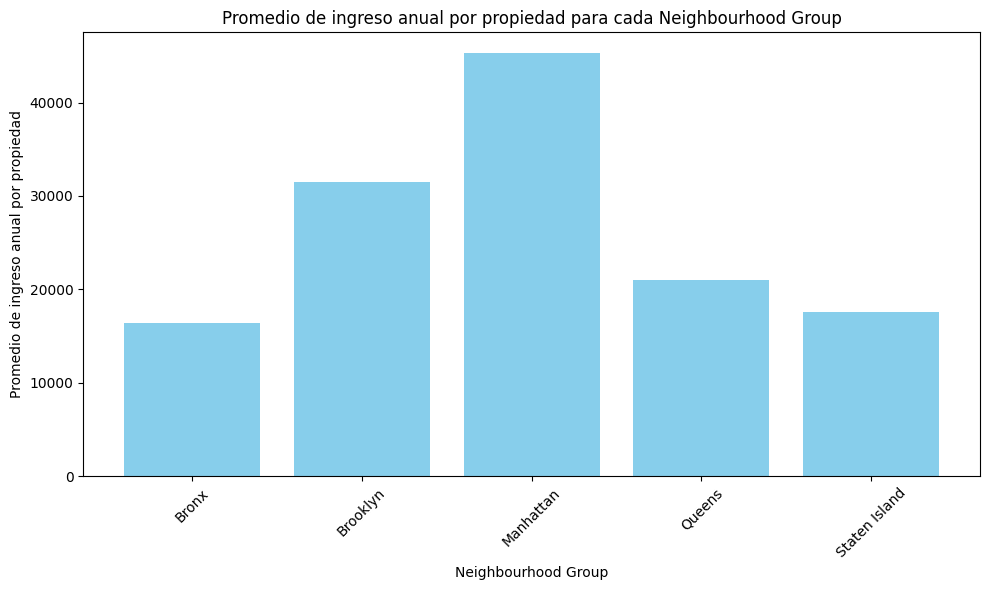

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(promedio_ingreso_grupo['neighbourhood_group'], promedio_ingreso_grupo['ingreso_anual_y'], color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Promedio de ingreso anual por propiedad')
plt.title('Promedio de ingreso anual por propiedad para cada Neighbourhood Group')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [20]:
#Para este siguiente ejercicio, se realizo las medidas necesarias para finalmente con un mapa de calor, poder mostrar precios promedios, dias arrendados, etc. por cada una de las comunas
import folium
from folium.plugins import HeatMap
import pandas as pd

In [21]:
cantidad_por_sector = df['neighbourhood_group'].value_counts().reset_index()
cantidad_por_sector.columns = ['neighbourhood_group', 'cantidad']

In [22]:
precio_promedio_por_sector = df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [23]:
dias_promedio_por_sector = (365 - df.groupby('neighbourhood_group')['availability_365'].mean()).reset_index()
dias_promedio_por_sector.columns = ['neighbourhood_group', 'dias_promedio']

In [24]:
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)


In [25]:
coordenadas_por_sector = df.groupby('neighbourhood_group')[['latitude', 'longitude']].mean().reset_index()
coordenadas_por_sector = coordenadas_por_sector[['latitude', 'longitude']].values.tolist()
HeatMap(coordenadas_por_sector).add_to(mapa)

In [26]:
for idx, row in cantidad_por_sector.iterrows():
    latitud_media, longitud_media = df[df['neighbourhood_group'] == row['neighbourhood_group']][['latitude', 'longitude']].mean()
    folium.Marker([latitud_media, longitud_media],
                   popup=f"Cantidad: {row['cantidad']}<br>Precio promedio: ${precio_promedio_por_sector.loc[precio_promedio_por_sector['neighbourhood_group'] == row['neighbourhood_group']]['price'].values[0]:.2f}<br>Días promedio: {dias_promedio_por_sector.loc[dias_promedio_por_sector['neighbourhood_group'] == row['neighbourhood_group']]['dias_promedio'].values[0]:.2f}").add_to(mapa)


In [27]:
mapa.save('mapa_propiedades.html')

In [32]:
# Rellenar o eliminar valores nulos
df = df.dropna(subset=['price', 'neighbourhood', 'room_type', 'reviews_per_month'])

In [37]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])

# Vista previa de los datos procesados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,dias_arrendados,ingreso_anual
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,107,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,126,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355,10,2250
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194,171,15219
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0,365,29200
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,136,40.74767,-73.97500,0,200,3,74,2019-06-22,0.59,1,129,236,47200


In [40]:
# Definir variables independientes y dependientes
X = df[['neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 24483.798026850785
R² Score: 0.14911486928103634


In [ ]:
#El R² score es 0.14911486928103634, lo que significa que aproximadamente el 14.91% de la variabilidad en los precios de las propiedades es explicada por el modelo. Esto sugiere que el modelo no está capturando bien la relación entre las variables independientes y el precio de las propiedades.
#R² Bajo: Un R² de 0.149 indica que el modelo solo explica una pequeña parte de la variabilidad de los precios de las propiedades.

In [41]:
#MSE Alto: Un MSE de 24483.8 sugiere que los errores en las predicciones son relativamente grandes.
#el MSE es 24483.798026850785, lo que significa que, en promedio, el cuadrado de los errores (diferencias entre las predicciones y los valores reales) es de aproximadamente 24483.8.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

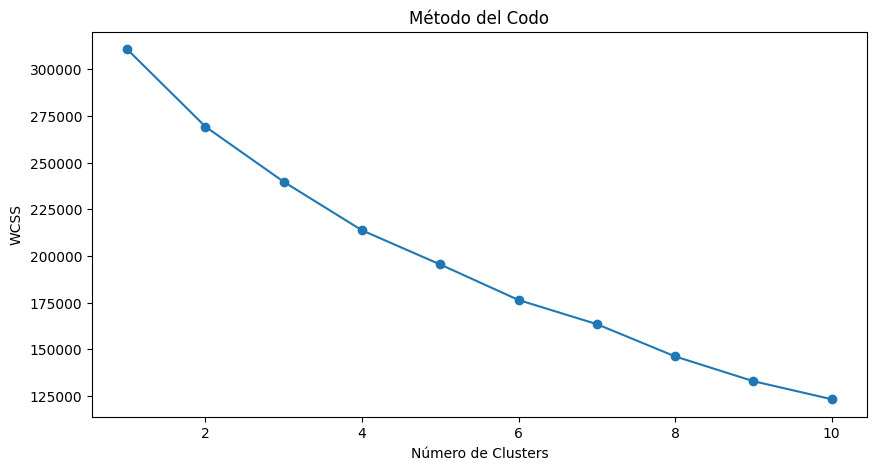

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


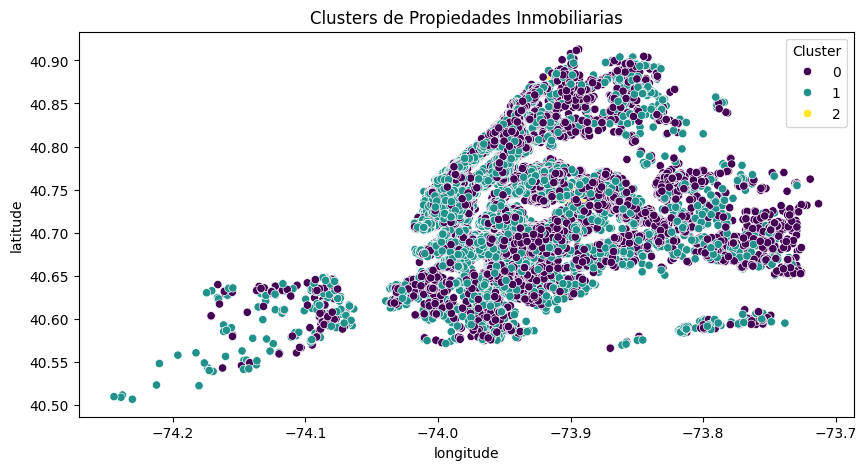

In [45]:
#K- MEANS
# Seleccionar las características para el clustering
X_cluster = df[['latitude', 'longitude', 'price', 'room_type', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Escalar los datos
X_scaled = scaler.fit_transform(X_cluster)

# Determinar el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Por ejemplo, eligiendo 3 clusters
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al dataframe original
df['Cluster'] = clusters

# Visualización de los clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de Propiedades Inmobiliarias')
plt.show()

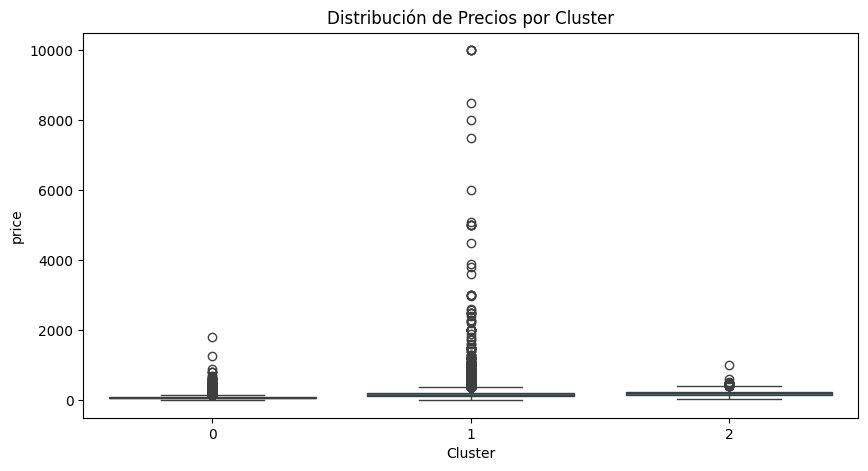

In [47]:

# Boxplot para precios por cluster
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cluster', y='price', data=df)
plt.title('Distribución de Precios por Cluster')
plt.show()

In [ ]:
#Hipótesis sobre la ubicación y el precio

# Se cumple, H1: Las propiedades ubicadas en ciertos barrios (Neighbourhood) tienen precios significativamente más altos en comparación con otras áreas.

#Hipótesis sobre la disponibilidad y la demanda

# Se cumple, H2: Las propiedades con mayor disponibilidad anual (Availability_365) tienen una menor demanda en comparación con aquellas con menor disponibilidad

# Hipótesis sobre el revenue y la disponibilidad

# Se cumple, H3: Las propiedades con una menor disponibilidad, poseen un mayor revenue

In [48]:
#Conclusión Final
#El K-means Clustering puede revelar grupos naturales en tus datos inmobiliarios, proporcionando insights valiosos sobre las características y el comportamiento del mercado en diferentes segmentos. Estas agrupaciones pueden informar decisiones estratégicas en términos de precios, marketing, y desarrollo de nuevas propiedades, ayudando a adaptar las ofertas a las necesidades y preferencias de los diferentes segmentos del mercado.